# Preamble

In [43]:
import os
from importlib import reload
os.chdir('/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD')

%matplotlib inline 

import mycode
reload(mycode);

In [44]:
from mycode import money
from mycode import preamble
from mycode import weights 
from mycode import maps 

from tqdm import tqdm 

%run mycode/preamble.py

reload(weights)
reload(preamble)
reload(maps)
reload(money);

In [45]:
import astroML
from astroML.plotting import scatter_contour

import numpy as np 

In [46]:
from astropy.table import Table

# Simulate patch with new code

In [85]:
# subprocess.run('bsub -W 00:50 -o output1.txt -r "./WeakLensingDeblending/simulate.py \
#                 --catalog-name params/OneDegSq.fits --image-width 1800 --image-height 1800\
#                --ra-center -0.05 --dec-center -0.45\
#                --survey-name LSST --filter-band i --output-name data/idemo1 \
#                --verbose --no-stamps --no-hsm --no-agn --calculate-bias"',shell=True)

# subprocess.run('bsub -W 00:50 -o output1.txt -r "./WeakLensingDeblending/simulate.py \
#                 --catalog-name params/OneDegSq.fits --image-width 1800 --image-height 1800\
#                --ra-center -0.05 --dec-center -0.45\
#                --survey-name LSST --filter-band i --output-name data/idemo1_2 \
#                --verbose --no-stamps --no-hsm --no-agn --calculate-bias"',shell=True)

CompletedProcess(args='bsub -W 00:50 -o output1.txt -r "./WeakLensingDeblending/simulate.py                 --catalog-name params/OneDegSq.fits --image-width 1800 --image-height 1800               --ra-center -0.05 --dec-center -0.45               --survey-name LSST --filter-band i --output-name data/idemo1_2                --verbose --no-stamps --no-hsm --no-agn --calculate-bias"', returncode=0)

In [86]:
# subprocess.run('bsub -W 00:50 -o output2.txt -r "./WeakLensingDeblending/simulate.py \
#                 --catalog-name params/OneDegSq.fits --image-width 1800 --image-height 1800\
#                --ra-center -0.05 --dec-center -0.45\
#                --survey-name LSST --filter-band i --output-name data/idemo2 \
#                --verbose --no-stamps --no-hsm --no-agn --calculate-bias --equilibrate"',shell=True)

# subprocess.run('bsub -W 00:50 -o output2.txt -r "./WeakLensingDeblending/simulate.py \
#                 --catalog-name params/OneDegSq.fits --image-width 1800 --image-height 1800\
#                --ra-center -0.05 --dec-center -0.45\
#                --survey-name LSST --filter-band i --output-name data/idemo2_2 \
#                --verbose --no-stamps --no-hsm --no-agn --calculate-bias --equilibrate"',shell=True)

CompletedProcess(args='bsub -W 00:50 -o output2.txt -r "./WeakLensingDeblending/simulate.py                 --catalog-name params/OneDegSq.fits --image-width 1800 --image-height 1800               --ra-center -0.05 --dec-center -0.45               --survey-name LSST --filter-band i --output-name data/idemo2_2                --verbose --no-stamps --no-hsm --no-agn --calculate-bias --equilibrate"', returncode=0)

In [42]:
# subprocess.run('bsub -W 00:50 -o output1.txt -r "./WeakLensingDeblending/simulate.py \
#                 --catalog-name params/OneDegSq.fits --image-width 1800 --image-height 1800\
#                --ra-center -0.05 --dec-center -0.45\
#                --survey-name LSST --filter-band i --output-name data/nidemo1 \
#                --verbose --no-stamps --no-hsm --no-agn"',shell=True)

# subprocess.run('bsub -W 00:50 -o output2.txt -r "./WeakLensingDeblending/simulate.py \
#                 --catalog-name params/OneDegSq.fits --image-width 1800 --image-height 1800\
#                --ra-center -0.05 --dec-center -0.45\
#                --survey-name LSST --filter-band i --output-name data/nidemo2 \
#                --verbose --no-stamps --no-hsm --no-agn --equilibrate"',shell=True)

CompletedProcess(args='bsub -W 00:50 -o output2.txt -r "./WeakLensingDeblending/simulate.py                 --catalog-name params/OneDegSq.fits --image-width 1800 --image-height 1800               --ra-center -0.05 --dec-center -0.45               --survey-name LSST --filter-band i --output-name data/nidemo2                --verbose --no-stamps --no-hsm --no-agn --equilibrate"', returncode=0)

# Comparison of the two patches

In [47]:
cat1 = Table.read("data/idemo1.fits")
cat2 = Table.read("data/idemo2.fits")

cat12 = Table.read("data/idemo1_2.fits")
cat22 = Table.read("data/idemo2_2.fits")

ncat1 = Table.read("data/nidemo1.fits")
ncat2 = Table.read("data/nidemo2.fits")

In [48]:
assert np.all(cat1['db_id']==cat2['db_id']), "the galaxies in both catalogues are not the same!"

## number of dropped objects

In [49]:
print(len(cat1[cat1['snr_grpf'] == 0 ]))
print(len(cat2[cat2['snr_grpf'] == 0 ]))
print()

#extra catalogues to check any stochasticity. 
print(len(cat12[cat12['snr_grpf'] == 0 ]))
print(len(cat22[cat22['snr_grpf'] == 0 ]))
print()

#extra catalogues to check any stochasticity. 
print(len(ncat1[ncat1['snr_grpf'] == 0 ]))
print(len(ncat2[ncat2['snr_grpf'] == 0 ]))
print()

28
28

28
28

28
28



## investigate whether there is a difference between "same" catalgoues

In [71]:
for name in cat1.colnames:
    if not np.allclose(cat1[name],cat12[name], rtol=1e-8, atol=1e-8):
        print(f'difference in {name}')

In [73]:
for name in cat2.colnames:
    if not np.allclose(cat2[name],cat22[name],  rtol=1e-8, atol=1e-8):
        print(f'difference in {name}')

In [74]:
for name in ncat1.colnames:
    if not np.allclose(ncat1[name],cat1[name],  rtol=1e-8, atol=1e-8):
        print(f'difference in {name}')

In [75]:
for name in ncat2.colnames:
    if not np.allclose(ncat2[name],cat2[name],  rtol=1e-8, atol=1e-8):
        print(f'difference in {name}')

In [72]:
for name in cat1.colnames:
    if not np.allclose(cat1[name],cat2[name],  rtol=1e-8, atol=1e-8):
        print(f'difference in {name}')

difference in cond_num
difference in cond_num_grp
difference in bias_f_grp
difference in bias_s_grp
difference in bias_g1_grp
difference in bias_g2_grp
difference in bias_x_grp
difference in bias_y_grp


In [76]:
for name in ncat1.colnames:
    if not np.allclose(ncat1[name], ncat2[name],  rtol=1e-8, atol=1e-8):
        print(f'difference in {name}')

difference in cond_num
difference in cond_num_grp


## histogram of condition numbers

16.083677
12.451305
8780 8780


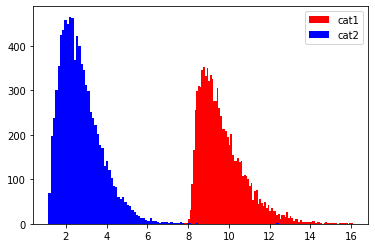

In [14]:
conds1 = np.log10(cat1[cat1['cond_num'] < np.inf]['cond_num'])
plt.hist(conds1, bins=100, color='r', label='cat1')
print(max(conds1[conds1 < np.inf]))

conds2 = np.log10((cat2['cond_num']))
plt.hist(conds2, bins=100, color='b', label='cat2')
print(max(conds2))

print(len(conds1), len(conds2))
plt.legend()

17.956139
12.435034


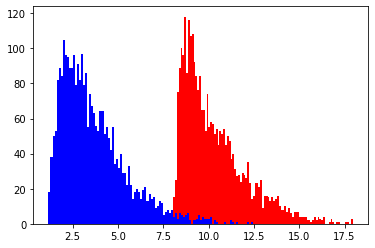

In [15]:
grp_conds1 = np.log10(np.array(list(set(cat1['cond_num_grp']))))
grp_conds1 = grp_conds1[grp_conds1 < np.inf]
plt.hist(grp_conds1, bins=100, color='r')
print(max(grp_conds1))

grp_conds2 = np.log10(np.array(list(set(cat2['cond_num_grp']))))
plt.hist(grp_conds2, bins=100, color='b')
print(max(grp_conds2))

In [20]:
assert np.all((cat1['snr_grpf'] == 0) == (cat2['snr_grpf']==0))
ninfs = ~(cat1['snr_grpf'] == 0)

(0, 200)

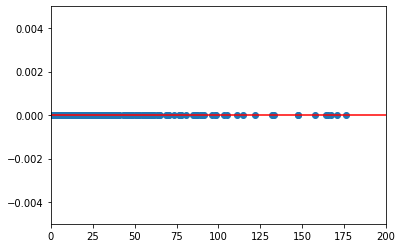

In [24]:
plt.scatter(cat1['dg1_grp'][ninfs], cat2['dg1_grp'][ninfs]- cat1['dg1_grp'][ninfs])
plt.plot([0,1000], [0,0], c='r')
plt.ylim(-.005, 0.005)
plt.xlim(0,200)

(-0.005, 0.005)

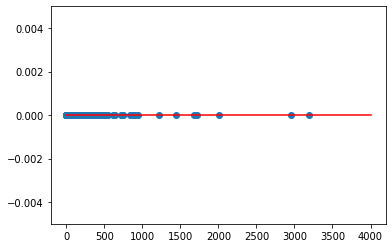

In [25]:
plt.scatter(cat1['snr_grpf'], cat2['snr_grpf']- cat1['snr_grpf'])
plt.plot([0,4000], [0,0], c='r')
plt.ylim(-.005, 0.005)

In [40]:
print(np.count_nonzero(ninfs))
print(np.max( np.absolute(cat1['snr_grpf'][ninfs] -  cat2['snr_grpf'][ninfs])))
print(np.max( np.absolute(cat1['dg1_grp'][ninfs] -  cat2['dg1_grp'][ninfs])))
print(np.max( np.absolute(cat1['ds_grp'][ninfs] -  cat2['ds_grp'][ninfs])))

8752
0.0
0.0
0.0


In [41]:
assert np.all(cat1[cat1['snr_grpf']==0]['db_id'] == cat2[cat2['snr_grpf']==0]['db_id']),"all galaxies dropped are exactly the same"

# Compare bias

In [77]:
print(np.max( cat1['bias_g1'] - cat2['bias_g1']))
print(np.min( cat1['bias_g1'] - cat2['bias_g1']))


print()
print(np.max(
    (cat1['bias_f'][ninfs] - cat2['bias_f'][ninfs])/ cat1['bias_f'][ninfs] ))
print(np.min( cat1['bias_f'] - cat2['bias_f']))

print()
print(np.max( cat1['bias_s'] - cat2['bias_s']))
print(np.min( cat1['bias_s'] - cat2['bias_s']))

print()
print(np.max( cat1['bias_g1_grp'] - cat2['bias_g1_grp']))
print(np.min( cat1['bias_g1_grp'] - cat2['bias_g1_grp']))

print()
print(np.max( cat1['bias_g2_grp'] - cat2['bias_g2_grp']))
print(np.min( cat1['bias_g2_grp'] - cat2['bias_g2_grp']))

print()
print(np.max(
    (cat1['bias_f_grp'][ninfs] - cat2['bias_f_grp'][ninfs])/ cat1['bias_f_grp'][ninfs] ))
print(np.min( cat1['bias_f_grp'] - cat2['bias_f_grp']))

print()
print(np.max( cat1['bias_s_grp'] - cat2['bias_s_grp']))
print(np.min( cat1['bias_s_grp'] - cat2['bias_s_grp']))

0.0
0.0

0.0
0.0

0.0
0.0

9.536743e-07
-9.536743e-07

1.5258789e-05
-3.0517578e-05

0.00042682514
-0.07421875

3.0517578e-05
-1.9073486e-06
